In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [2]:
dataset = '../annotation/concat_output.csv'
model_save_path = '../model/point_history_center.hdf5'

In [3]:
NUM_CLASSES = 7
TIME_STEPS = 16
DIMENSION = 2

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION) + 1)))
print(X_dataset.shape)

(3419, 32)


In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))
print(y_dataset.shape)

(3419,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2564, 32)
(2564,)
(855, 32)
(855,)


# Model building

In [7]:
use_lstm = True
model = None

if use_lstm:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS * DIMENSION, )), 
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.LSTM(32, input_shape=[TIME_STEPS, DIMENSION]),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
else:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 16, 2)             0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 2)             0         
_________________________________________________________________
lstm (LSTM)                  (None, 32)                4480      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                330       
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 77        
Total params: 4,887
Trainable params: 4,887
Non-trainable params: 0
______________________________________________________

In [9]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=2000,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/2000
81/81 [==============================] - 2s 6ms/step - loss: 1.9439 - accuracy: 0.1541 - val_loss: 1.9355 - val_accuracy: 0.1813

Epoch 00001: saving model to ../model/point_history_center.hdf5
Epoch 2/2000
81/81 [==============================] - 0s 3ms/step - loss: 1.9185 - accuracy: 0.2387 - val_loss: 1.9086 - val_accuracy: 0.2632

Epoch 00002: saving model to ../model/point_history_center.hdf5
Epoch 3/2000
81/81 [==============================] - 0s 3ms/step - loss: 1.8804 - accuracy: 0.2683 - val_loss: 1.8689 - val_accuracy: 0.2316

Epoch 00003: saving model to ../model/point_history_center.hdf5
Epoch 4/2000
81/81 [==============================] - 0s 3ms/step - loss: 1.8273 - accuracy: 0.2547 - val_loss: 1.8310 - val_accuracy: 0.2211

Epoch 00004: saving model to ../model/point_history_center.hdf5
Epoch 5/2000
81/81 [==============================] - 0s 3ms/step - loss: 1.7890 - accuracy: 0.2527 - val_loss: 1.8103 - val_accuracy: 0.2164

Epoch 00005: saving model to 

81/81 [==============================] - 0s 3ms/step - loss: 0.7953 - accuracy: 0.6872 - val_loss: 0.7364 - val_accuracy: 0.7216

Epoch 00040: saving model to ../model/point_history_center.hdf5
Epoch 41/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.7743 - accuracy: 0.6977 - val_loss: 0.7267 - val_accuracy: 0.7228

Epoch 00041: saving model to ../model/point_history_center.hdf5
Epoch 42/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.7635 - accuracy: 0.7024 - val_loss: 0.7153 - val_accuracy: 0.7240

Epoch 00042: saving model to ../model/point_history_center.hdf5
Epoch 43/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.7490 - accuracy: 0.7044 - val_loss: 0.7034 - val_accuracy: 0.7298

Epoch 00043: saving model to ../model/point_history_center.hdf5
Epoch 44/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.7458 - accuracy: 0.7032 - val_loss: 0.6936 - val_accuracy: 0.7322

Epoch 00044: saving model to ../model/

81/81 [==============================] - 0s 3ms/step - loss: 0.4792 - accuracy: 0.8354 - val_loss: 0.4309 - val_accuracy: 0.8632

Epoch 00079: saving model to ../model/point_history_center.hdf5
Epoch 80/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.4646 - accuracy: 0.8393 - val_loss: 0.4284 - val_accuracy: 0.8585

Epoch 00080: saving model to ../model/point_history_center.hdf5
Epoch 81/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.4740 - accuracy: 0.8315 - val_loss: 0.4177 - val_accuracy: 0.8678

Epoch 00081: saving model to ../model/point_history_center.hdf5
Epoch 82/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.4657 - accuracy: 0.8409 - val_loss: 0.4377 - val_accuracy: 0.8620

Epoch 00082: saving model to ../model/point_history_center.hdf5
Epoch 83/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.4463 - accuracy: 0.8495 - val_loss: 0.4111 - val_accuracy: 0.8713

Epoch 00083: saving model to ../model/

81/81 [==============================] - 0s 3ms/step - loss: 0.3383 - accuracy: 0.8725 - val_loss: 0.2862 - val_accuracy: 0.9041

Epoch 00118: saving model to ../model/point_history_center.hdf5
Epoch 119/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.3401 - accuracy: 0.8760 - val_loss: 0.2884 - val_accuracy: 0.9064

Epoch 00119: saving model to ../model/point_history_center.hdf5
Epoch 120/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.3367 - accuracy: 0.8791 - val_loss: 0.2841 - val_accuracy: 0.9041

Epoch 00120: saving model to ../model/point_history_center.hdf5
Epoch 121/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.3271 - accuracy: 0.8814 - val_loss: 0.2886 - val_accuracy: 0.9053

Epoch 00121: saving model to ../model/point_history_center.hdf5
Epoch 122/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.3319 - accuracy: 0.8764 - val_loss: 0.2802 - val_accuracy: 0.9053

Epoch 00122: saving model to ../mo

81/81 [==============================] - 0s 3ms/step - loss: 0.2715 - accuracy: 0.8990 - val_loss: 0.2269 - val_accuracy: 0.9170

Epoch 00157: saving model to ../model/point_history_center.hdf5
Epoch 158/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.2720 - accuracy: 0.8982 - val_loss: 0.2284 - val_accuracy: 0.9181

Epoch 00158: saving model to ../model/point_history_center.hdf5
Epoch 159/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.2819 - accuracy: 0.9002 - val_loss: 0.2253 - val_accuracy: 0.9193

Epoch 00159: saving model to ../model/point_history_center.hdf5
Epoch 160/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.2699 - accuracy: 0.8990 - val_loss: 0.2300 - val_accuracy: 0.9135

Epoch 00160: saving model to ../model/point_history_center.hdf5
Epoch 161/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.2521 - accuracy: 0.9119 - val_loss: 0.2231 - val_accuracy: 0.9205

Epoch 00161: saving model to ../mo

81/81 [==============================] - 0s 3ms/step - loss: 0.2278 - accuracy: 0.9169 - val_loss: 0.1845 - val_accuracy: 0.9392

Epoch 00196: saving model to ../model/point_history_center.hdf5
Epoch 197/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.2237 - accuracy: 0.9189 - val_loss: 0.1840 - val_accuracy: 0.9357

Epoch 00197: saving model to ../model/point_history_center.hdf5
Epoch 198/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.2253 - accuracy: 0.9099 - val_loss: 0.1846 - val_accuracy: 0.9333

Epoch 00198: saving model to ../model/point_history_center.hdf5
Epoch 199/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.2374 - accuracy: 0.9119 - val_loss: 0.1817 - val_accuracy: 0.9392

Epoch 00199: saving model to ../model/point_history_center.hdf5
Epoch 200/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.2224 - accuracy: 0.9204 - val_loss: 0.1837 - val_accuracy: 0.9357

Epoch 00200: saving model to ../mo

81/81 [==============================] - 0s 3ms/step - loss: 0.1969 - accuracy: 0.9290 - val_loss: 0.1489 - val_accuracy: 0.9509

Epoch 00235: saving model to ../model/point_history_center.hdf5
Epoch 236/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.1906 - accuracy: 0.9317 - val_loss: 0.1485 - val_accuracy: 0.9485

Epoch 00236: saving model to ../model/point_history_center.hdf5
Epoch 237/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.1815 - accuracy: 0.9360 - val_loss: 0.1433 - val_accuracy: 0.9556

Epoch 00237: saving model to ../model/point_history_center.hdf5
Epoch 238/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.1895 - accuracy: 0.9302 - val_loss: 0.1481 - val_accuracy: 0.9520

Epoch 00238: saving model to ../model/point_history_center.hdf5
Epoch 239/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.1913 - accuracy: 0.9314 - val_loss: 0.1461 - val_accuracy: 0.9532

Epoch 00239: saving model to ../mo

81/81 [==============================] - 0s 3ms/step - loss: 0.1641 - accuracy: 0.9399 - val_loss: 0.1168 - val_accuracy: 0.9626

Epoch 00274: saving model to ../model/point_history_center.hdf5
Epoch 275/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.1665 - accuracy: 0.9325 - val_loss: 0.1194 - val_accuracy: 0.9626

Epoch 00275: saving model to ../model/point_history_center.hdf5
Epoch 276/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.1642 - accuracy: 0.9388 - val_loss: 0.1160 - val_accuracy: 0.9614

Epoch 00276: saving model to ../model/point_history_center.hdf5
Epoch 277/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.1539 - accuracy: 0.9415 - val_loss: 0.1178 - val_accuracy: 0.9626

Epoch 00277: saving model to ../model/point_history_center.hdf5
Epoch 278/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.1590 - accuracy: 0.9403 - val_loss: 0.1174 - val_accuracy: 0.9602

Epoch 00278: saving model to ../mo

81/81 [==============================] - 0s 3ms/step - loss: 0.1297 - accuracy: 0.9567 - val_loss: 0.0905 - val_accuracy: 0.9789

Epoch 00313: saving model to ../model/point_history_center.hdf5
Epoch 314/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.1250 - accuracy: 0.9563 - val_loss: 0.0941 - val_accuracy: 0.9719

Epoch 00314: saving model to ../model/point_history_center.hdf5
Epoch 315/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.1352 - accuracy: 0.9548 - val_loss: 0.0923 - val_accuracy: 0.9825

Epoch 00315: saving model to ../model/point_history_center.hdf5
Epoch 316/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.1359 - accuracy: 0.9563 - val_loss: 0.0857 - val_accuracy: 0.9836

Epoch 00316: saving model to ../model/point_history_center.hdf5
Epoch 317/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.1264 - accuracy: 0.9594 - val_loss: 0.0835 - val_accuracy: 0.9836

Epoch 00317: saving model to ../mo

81/81 [==============================] - 0s 3ms/step - loss: 0.1061 - accuracy: 0.9657 - val_loss: 0.0708 - val_accuracy: 0.9836

Epoch 00352: saving model to ../model/point_history_center.hdf5
Epoch 353/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.1019 - accuracy: 0.9676 - val_loss: 0.0633 - val_accuracy: 0.9883

Epoch 00353: saving model to ../model/point_history_center.hdf5
Epoch 354/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.1115 - accuracy: 0.9657 - val_loss: 0.0695 - val_accuracy: 0.9871

Epoch 00354: saving model to ../model/point_history_center.hdf5
Epoch 355/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.1148 - accuracy: 0.9606 - val_loss: 0.0596 - val_accuracy: 0.9895

Epoch 00355: saving model to ../model/point_history_center.hdf5
Epoch 356/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.1179 - accuracy: 0.9614 - val_loss: 0.0636 - val_accuracy: 0.9895

Epoch 00356: saving model to ../mo

81/81 [==============================] - 0s 3ms/step - loss: 0.1064 - accuracy: 0.9672 - val_loss: 0.0529 - val_accuracy: 0.9871

Epoch 00391: saving model to ../model/point_history_center.hdf5
Epoch 392/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0956 - accuracy: 0.9688 - val_loss: 0.0537 - val_accuracy: 0.9895

Epoch 00392: saving model to ../model/point_history_center.hdf5
Epoch 393/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0965 - accuracy: 0.9692 - val_loss: 0.0650 - val_accuracy: 0.9848

Epoch 00393: saving model to ../model/point_history_center.hdf5
Epoch 394/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0932 - accuracy: 0.9696 - val_loss: 0.0496 - val_accuracy: 0.9918

Epoch 00394: saving model to ../model/point_history_center.hdf5
Epoch 395/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0991 - accuracy: 0.9637 - val_loss: 0.0489 - val_accuracy: 0.9895

Epoch 00395: saving model to ../mo

81/81 [==============================] - 0s 3ms/step - loss: 0.0920 - accuracy: 0.9696 - val_loss: 0.0426 - val_accuracy: 0.9883

Epoch 00430: saving model to ../model/point_history_center.hdf5
Epoch 431/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.1033 - accuracy: 0.9657 - val_loss: 0.0399 - val_accuracy: 0.9918

Epoch 00431: saving model to ../model/point_history_center.hdf5
Epoch 432/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0793 - accuracy: 0.9746 - val_loss: 0.0494 - val_accuracy: 0.9906

Epoch 00432: saving model to ../model/point_history_center.hdf5
Epoch 433/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0834 - accuracy: 0.9723 - val_loss: 0.0451 - val_accuracy: 0.9895

Epoch 00433: saving model to ../model/point_history_center.hdf5
Epoch 434/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0873 - accuracy: 0.9723 - val_loss: 0.0466 - val_accuracy: 0.9895

Epoch 00434: saving model to ../mo

81/81 [==============================] - 0s 3ms/step - loss: 0.0751 - accuracy: 0.9750 - val_loss: 0.0368 - val_accuracy: 0.9906

Epoch 00469: saving model to ../model/point_history_center.hdf5
Epoch 470/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0818 - accuracy: 0.9688 - val_loss: 0.0305 - val_accuracy: 0.9930

Epoch 00470: saving model to ../model/point_history_center.hdf5
Epoch 471/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0753 - accuracy: 0.9739 - val_loss: 0.0309 - val_accuracy: 0.9930

Epoch 00471: saving model to ../model/point_history_center.hdf5
Epoch 472/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0792 - accuracy: 0.9746 - val_loss: 0.0329 - val_accuracy: 0.9906

Epoch 00472: saving model to ../model/point_history_center.hdf5
Epoch 473/2000
81/81 [==============================] - 0s 3ms/step - loss: 0.0725 - accuracy: 0.9785 - val_loss: 0.0312 - val_accuracy: 0.9930

Epoch 00473: saving model to ../mo

In [12]:
model = tf.keras.models.load_model(model_save_path)

In [13]:
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[1.9502300e-08 9.9998641e-01 2.6477872e-11 5.7489299e-15 3.1445204e-09
 1.5580889e-08 1.3623691e-05]
1


# Confusion matrix

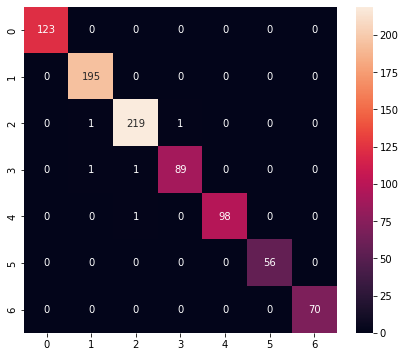

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       123
           1       0.99      1.00      0.99       195
           2       0.99      0.99      0.99       221
           3       0.99      0.98      0.98        91
           4       1.00      0.99      0.99        99
           5       1.00      1.00      1.00        56
           6       1.00      1.00      1.00        70

    accuracy                           0.99       855
   macro avg       1.00      0.99      0.99       855
weighted avg       0.99      0.99      0.99       855



In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [15]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('../model/lstm_model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmptfxmqh48/assets


INFO:tensorflow:Assets written to: /tmp/tmptfxmqh48/assets
